### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 ====> 곡선형태의 회귀선 수식
- 모듈 : sklearn.preprocessing내에 포함
- 데이터 : fish.csv
- 피 쳐 : Perch의 Height, Length, Width
- 타 겟 : Perch의 Weight
- 학습유형 : 지도학습

[1] 전처리 피쳐 조합 생성 살펴보기

In [471]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [472]:
# 인스턴스 생성
poly = PolynomialFeatures()
# degree : 차원 설정 / 기본값 : 2 (차원)
# order : 메모리에 저장되는 순서
# include_bias = False -> 1 제외 / 기본값 : True
# interaction_only = True -> 피쳐 간의 상호작용 (즉, 피쳐들의 곱)만을 포함 / 기본값 : False

In [473]:
poly.fit([[2,3]])

PolynomialFeatures()

In [474]:
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [475]:
poly.get_feature_names_out() # 피쳐 이름

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

[2] Peach 데이터를 최대한 만족하는 회귀선 찾기

[2-1] 모듈 로딩 및 데이터 준비 <hr>

In [476]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import heejin

In [477]:
dataDF = pd.read_csv('../data/fish.csv')
dataDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [478]:
dataDF.drop('Diagonal', axis=1, inplace=True)
dataDF

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,12.2,2.0904,1.3936
155,Smelt,13.4,12.4,2.4300,1.2690
156,Smelt,12.2,13.0,2.2770,1.2558
157,Smelt,19.7,14.3,2.8728,2.0672


In [479]:
PerchDF = dataDF[dataDF['Species'] == 'Perch']
PerchDF.reset_index(drop = True, inplace=True)

In [480]:
PerchDF.head()

,Species,Weight,Length,Height,Width
0,Perch,5.9,8.4,2.1120,1.4080
1,Perch,32.0,13.7,3.5280,1.9992
2,Perch,40.0,15.0,3.8240,2.4320
3,Perch,51.5,16.2,4.5924,2.6316
4,Perch,70.0,17.4,4.5880,2.9415


[2-2] 데이터 확인<hr>
- 학습 유형 결정을 위한 단계
- 피쳐 스케일링 필요 여부 체크

In [481]:
featureDF = PerchDF[PerchDF.columns[2:]]
targetSR = PerchDF[PerchDF.columns[1]]
featureDF

,Length,Height,Width
0,8.4,2.1120,1.4080
1,13.7,3.5280,1.9992
2,15.0,3.8240,2.4320
3,16.2,4.5924,2.6316
4,17.4,4.5880,2.9415
5,18.0,5.2224,3.3216
6,18.7,5.1992,3.1234
7,19.0,5.6358,3.0502
8,19.6,5.1376,3.0368
9,20.0,5.0820,2.7720


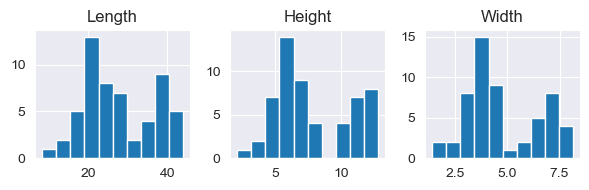

In [482]:
plt.figure(figsize=(6,2))
n = 1
for i in featureDF.columns:
    plt.subplot(1,3,n)
    plt.hist(PerchDF[i])
    plt.title(i)
    n += 1
plt.tight_layout()
plt.show()

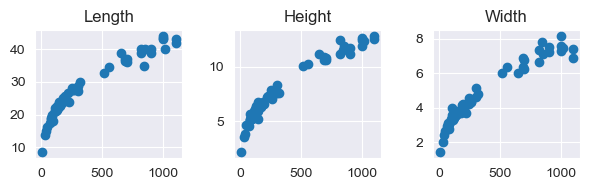

In [483]:
plt.figure(figsize=(6,2))
n = 1
for i in featureDF.columns:
    plt.subplot(1,3,n)
    plt.scatter(targetSR,PerchDF[i])
    plt.title(i)
    n += 1
plt.tight_layout()
plt.show()

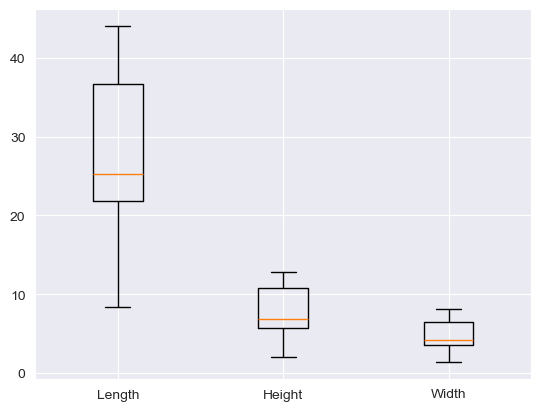

In [484]:
plt.boxplot(featureDF) 
plt.xticks([1,2,3],featureDF.columns)
plt.show()

In [485]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=1)

In [486]:
heejin.find_scaler(xtrain,ytrain,xtest,ytest,LinearRegression()) #  거의 비슷

model : LinearRegression()
scaler : StandardScaler()
Train score : 0.9331798429518988
Test score : 0.9542015714996183

[모델 설명도]
R2 : 0.9542015714996183
[에러]
MAE : 64.37158185048092
MSE : 5568.6038875668155
RMSE : 74.62307878643722

--------------------------------------

model : LinearRegression()
scaler : MinMaxScaler()
Train score : 0.9331798429518988
Test score : 0.9542015714996182

[모델 설명도]
R2 : 0.9542015714996182
[에러]
MAE : 64.37158185048105
MSE : 5568.603887566827
RMSE : 74.62307878643729

--------------------------------------

model : LinearRegression()
scaler : RobustScaler()
Train score : 0.9331798429518988
Test score : 0.9542015714996183

[모델 설명도]
R2 : 0.9542015714996183
[에러]
MAE : 64.37158185048092
MSE : 5568.603887566816
RMSE : 74.62307878643722

--------------------------------------


In [487]:
# 스케일링
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)
xtrain.shape, xtest.shape

((44, 3), (12, 3))

In [488]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtrain,ytrain),model.score(xtest, ytest)

(0.9331798429518988, 0.9542015714996183)

피쳐 늘려본거

In [489]:
from sklearn.preprocessing import PolynomialFeatures

scoreList = []
for i in range(1,6):
    # 학습 데이터를 변환기에 맞추고 변환
    poly = PolynomialFeatures(interaction_only=True, degree=i)
    poly.fit(xtrain)
    X_train_transformed = poly.transform(xtrain)
    
    # 테스트 데이터에 같은 변환 적용
    X_test_transformed = poly.transform(xtest)
    
    model = LinearRegression()
    model.fit(X_train_transformed, ytrain)
    score = model.score(X_test_transformed, ytest)
    scoreList.append(score)
    print(i,score)
D = scoreList.index(max(scoreList))+1
print(f'Max score의 degree: {D}')

1 0.9542015714996183
2 0.9678848094278434
3 0.9655496890739468
4 0.9655496890739468
5 0.9655496890739468
Max score의 degree: 2


In [490]:
poly = PolynomialFeatures(interaction_only=True, degree=D, include_bias=True)
poly.fit(xtrain)

X_train_transformed = poly.transform(xtrain)
X_test_transformed = poly.transform(xtest)

poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0 x1', 'x0 x2', 'x1 x2'], dtype=object)

In [491]:
model = LinearRegression()
model.fit(X_train_transformed, ytrain)
model.score(X_train_transformed,ytrain),model.score(X_test_transformed, ytest)

ytrain_pre = model.predict(X_train_transformed)
ytest_pre = model.predict(X_test_transformed)

len(ytest == ytest_pre)

12

In [492]:
heejin.find_scaler(X_train_transformed,ytrain,X_test_transformed,ytest,LinearRegression())

model : LinearRegression()
scaler : StandardScaler()
Train score : 0.991160760554704
Test score : 0.9678848094278435

[모델 설명도]
R2 : 0.9678848094278435
[에러]
MAE : 42.70468568097357
MSE : 3904.8670647851905
RMSE : 62.48893553890313

--------------------------------------

model : LinearRegression()
scaler : MinMaxScaler()
Train score : 0.991160760554704
Test score : 0.9678848094278435

[모델 설명도]
R2 : 0.9678848094278435
[에러]
MAE : 42.70468568097351
MSE : 3904.8670647851886
RMSE : 62.488935538903114

--------------------------------------

model : LinearRegression()
scaler : RobustScaler()
Train score : 0.991160760554704
Test score : 0.9678848094278434

[모델 설명도]
R2 : 0.9678848094278434
[에러]
MAE : 42.70468568097366
MSE : 3904.867064785202
RMSE : 62.48893553890322

--------------------------------------
